import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# เลือกฟอนต์ที่รองรับภาษาไทย เช่น TH Sarabun
plt.rcParams['font.family'] = ''


In [2]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/coffee_sale.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [3]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [4]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1749 non-null   object 
 1   datetime     1749 non-null   object 
 2   cash_type    1749 non-null   object 
 3   card         1660 non-null   object 
 4   money        1749 non-null   float64
 5   coffee_name  1749 non-null   object 
dtypes: float64(1), object(5)
memory usage: 82.1+ KB


เตรียมข้อมูล

In [5]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79 บาท
#1 USD = 41.42  UAH
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff['date'] = pd.to_datetime(coff['date'])

time_period_order = ['Morning', 'Afternoon', 'Evening']
coff['time_period'] = pd.Categorical(coff['time_period'], categories=time_period_order, ordered=True)

# สร้างคอลัมน์ 'day_of_week' ที่เก็บชื่อวันในสัปดาห์
coff['day_of_week'] = coff['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
coff['day_of_week'] = pd.Categorical(coff['day_of_week'], categories=days_order, ordered=True)
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon,Friday


In [6]:
# โหลดข้อมูลจากไฟล์ Excel
dataTemp = pd.read_excel('/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/export.xlsx')

# แสดงข้อมูลเบื้องต้น
dataTemp.info()

# ตรวจสอบชื่อคอลัมน์ใน dataTemp
print("Columns in dataTemp DataFrame:", dataTemp.columns)

# ตรวจสอบชื่อคอลัมน์ใน coff2
print("Columns in coff2 DataFrame:", coff.columns)

# แปลงคอลัมน์วันที่ในทั้งสอง DataFrame เป็น datetime
dataTemp['date'] = pd.to_datetime(dataTemp['date'])
coff['date'] = pd.to_datetime(coff['date'])

# รวมข้อมูล
coff = pd.merge(coff, dataTemp[['date', 'tavg']], on='date', how='left')

# เปลี่ยนชื่อคอลัมน์ tavg เป็น temperature
coff.rename(columns={'tavg': 'temperature'}, inplace=True)

# แสดงผลลัพธ์
print(coff.tail(50))  # แสดงผล 50 แถวสุดท้าย

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    214 non-null    object 
 1   tavg    214 non-null    float64
 2   tmin    214 non-null    float64
 3   tmax    214 non-null    float64
 4   prcp    206 non-null    float64
 5   snow    2 non-null      float64
 6   wdir    214 non-null    int64  
 7   wspd    214 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    214 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB
Columns in dataTemp DataFrame: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
Columns in coff2 DataFrame: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'day', 'hour', 'money_THB', 'time_period', 'day_of_week'],
      dtype='object'

In [7]:
coff

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon,Friday,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,2024-09-30,2024-09-30 19:53:14.092,card,ANON-0000-0000-0694,25.96,Americano with Milk,09,30,19,20.5084,Evening,Monday,12.5
1745,2024-09-30,2024-09-30 19:54:17.620,card,ANON-0000-0000-0631,35.76,Cortado,09,30,19,28.2504,Evening,Monday,12.5
1746,2024-09-30,2024-09-30 19:59:18.993,card,ANON-0000-0000-0531,30.86,Latte,09,30,19,24.3794,Evening,Monday,12.5
1747,2024-09-30,2024-09-30 20:00:42.135,card,ANON-0000-0000-0633,30.86,Americano with Milk,09,30,20,24.3794,Evening,Monday,12.5


In [8]:
coff.describe()

,date,money,money_THB,temperature
count,1749,1749.000000,1749.000000,1749.000000
mean,2024-06-25 09:49:30.154374144,31.510212,24.893067,17.950886
min,2024-03-01 00:00:00,18.120000,14.314800,-1.300000
25%,2024-05-09 00:00:00,27.920000,22.056800,15.700000
50%,2024-06-26 00:00:00,32.820000,25.927800,19.900000
75%,2024-08-17 00:00:00,37.720000,29.798800,22.200000
max,2024-09-30 00:00:00,40.000000,31.600000,29.600000
std,NaN,5.330878,4.211394,6.681016


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [9]:
mode = coff['money'].mode().iloc[0]
var = coff['money'].var()
med = coff['money'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 32.82
ค่าความแปรปรวน: 28.418261110827636
ค่ามัธยฐาน: 32.82


In [10]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนคอลัมพ์ของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1749
จำนวนคอลัมพ์ของข้อมูล : 13


การกระจายตัวของข้อมูลนี้ (สร้างตารางควอไทล์)

In [11]:
Q1 = coff['money'].quantile(0.25)
Q3 = coff['money'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money'] >= lower_bound) & (coff['money'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 27.92
Q3 : 37.72
IQR : 9.799999999999997
ค่าเฉลี่ยของข้อมูล : 31.510211549456834
lower_bound : 13.220000000000006
upper_bound : 52.419999999999995


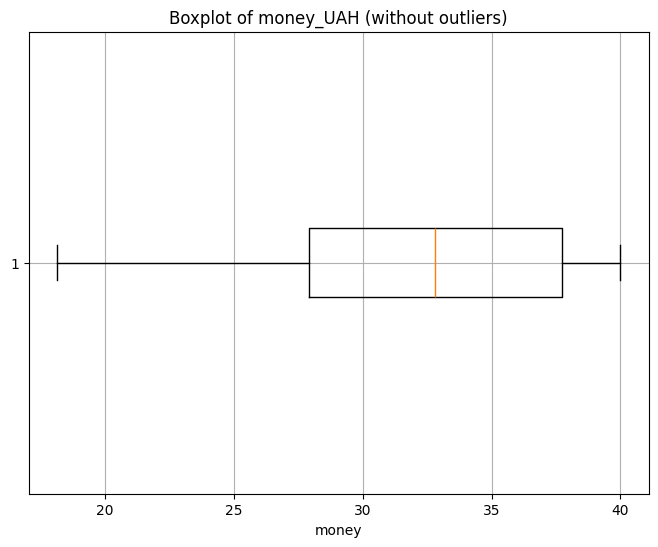

In [12]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(coff2['money'], vert=False)
plt.title('Boxplot of money_UAH (without outliers)')
plt.xlabel('money')
plt.grid(True)
plt.show()

จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [13]:
ans2 = coff[(coff['money'] <= lower_bound) | (coff['money'] >= upper_bound)]
print(ans2)

Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name, month, day, hour, money_THB, time_period, day_of_week, temperature]
Index: []


In [14]:
coffee_mean = coff2.groupby(['coffee_name'])['money'].mean()
coffee_max = coff2.groupby(['coffee_name'])['money'].max()
coffee_min = coff2.groupby(['coffee_name'])['money'].min()
print("---------mean----------")
print(coffee_mean)
print("----------max----------")
print(coffee_max)
print("----------min----------")
print(coffee_min)

---------mean----------
coffee_name
Americano              26.262857
Americano with Milk    30.544865
Cappuccino             36.124502
Cocoa                  35.372364
Cortado                25.952444
Espresso               20.956533
Hot Chocolate          36.567033
Latte                  35.425013
Name: money, dtype: float64
----------max----------
coffee_name
Americano              35.76
Americano with Milk    35.76
Cappuccino             40.00
Cocoa                  40.00
Cortado                35.76
Espresso               25.00
Hot Chocolate          40.00
Latte                  40.00
Name: money, dtype: float64
----------min----------
coffee_name
Americano              23.02
Americano with Milk    25.96
Cappuccino             23.02
Cocoa                  25.96
Cortado                23.02
Espresso               18.12
Hot Chocolate          25.96
Latte                  25.96
Name: money, dtype: float64


จำนวนการขายกาแฟในแต่ละครั้ง และยอดขาย (สร้างกราฟให้หน่อย)

In [15]:
value1 = coff2.groupby(['coffee_name']).size().sort_values()
value2 = coff2.groupby(['coffee_name'])['money'].sum().sort_values()
value3 = coff2.groupby(['coffee_name'])['money'].mean().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)
print('ราคาเฉลี่ยของกาแฟ')
print(value3)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   55
Espresso                75
Hot Chocolate           91
Cortado                180
Americano              238
Cappuccino             271
Latte                  395
Americano with Milk    444
dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso                1571.74
Cocoa                   1945.48
Hot Chocolate           3327.60
Cortado                 4671.44
Americano               6250.56
Cappuccino              9789.74
Americano with Milk    13561.92
Latte                  13992.88
Name: money, dtype: float64
ราคาเฉลี่ยของกาแฟ
coffee_name
Espresso               20.956533
Cortado                25.952444
Americano              26.262857
Americano with Milk    30.544865
Cocoa                  35.372364
Latte                  35.425013
Cappuccino             36.124502
Hot Chocolate          36.567033
Name: money, dtype: float64


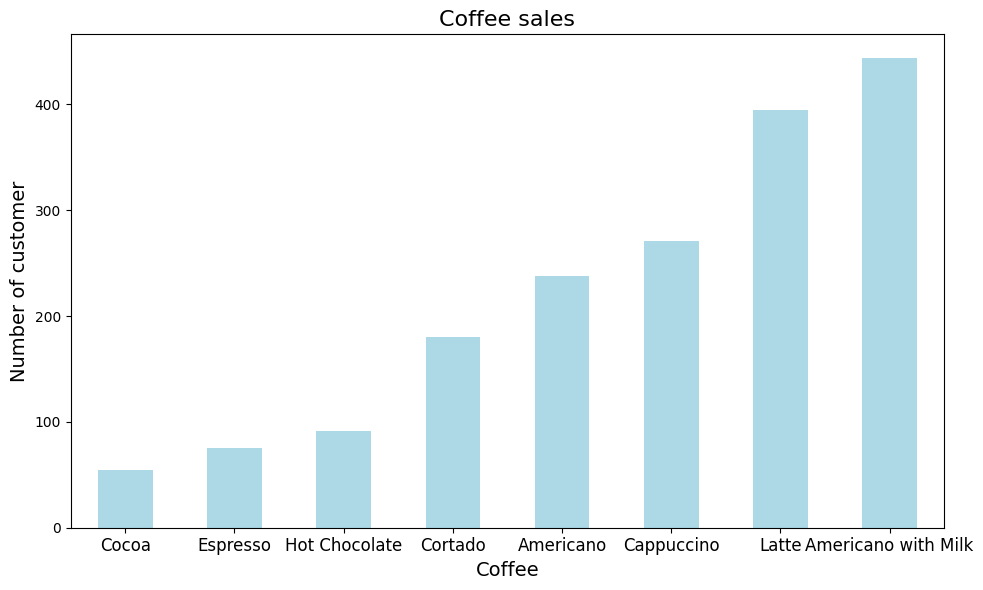

In [16]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value1.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sales', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

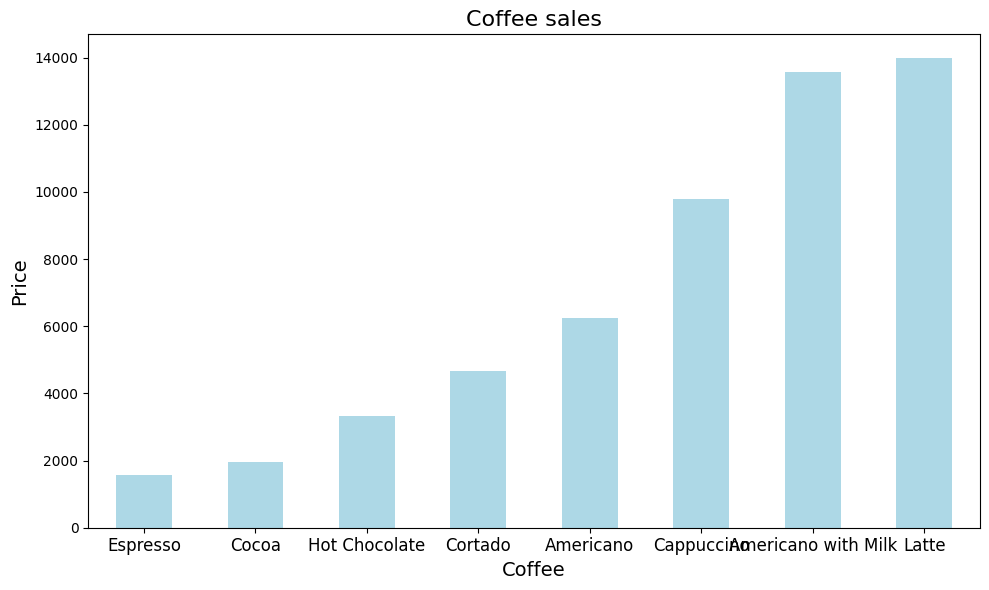

In [17]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value2.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sales', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

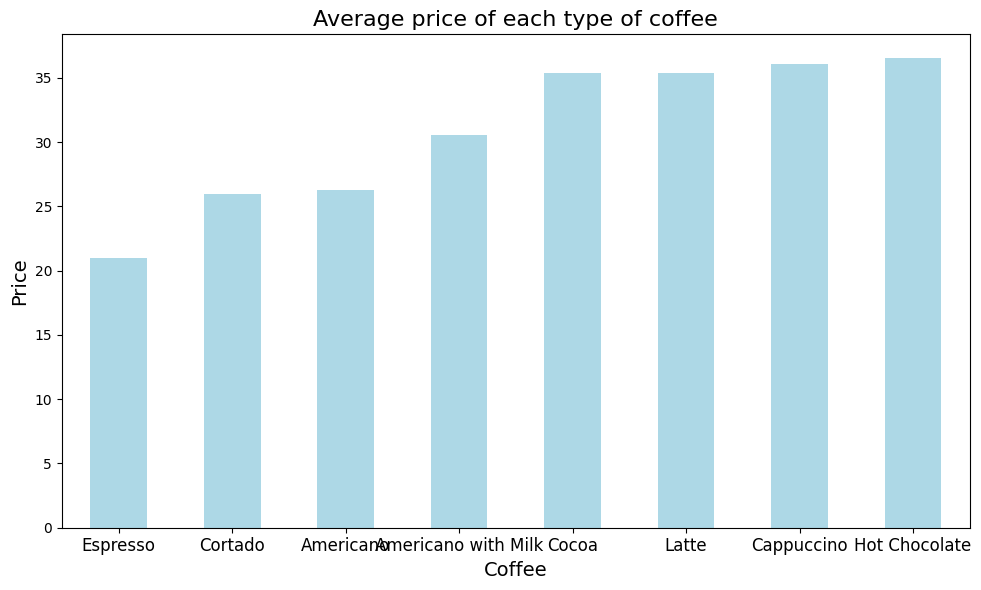

In [18]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value3.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Average price of each type of coffee', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [19]:
ans = coff2['month'].value_counts().sort_index()
print(ans)

month
03    206
04    196
05    267
06    227
07    237
08    272
09    344
Name: count, dtype: int64


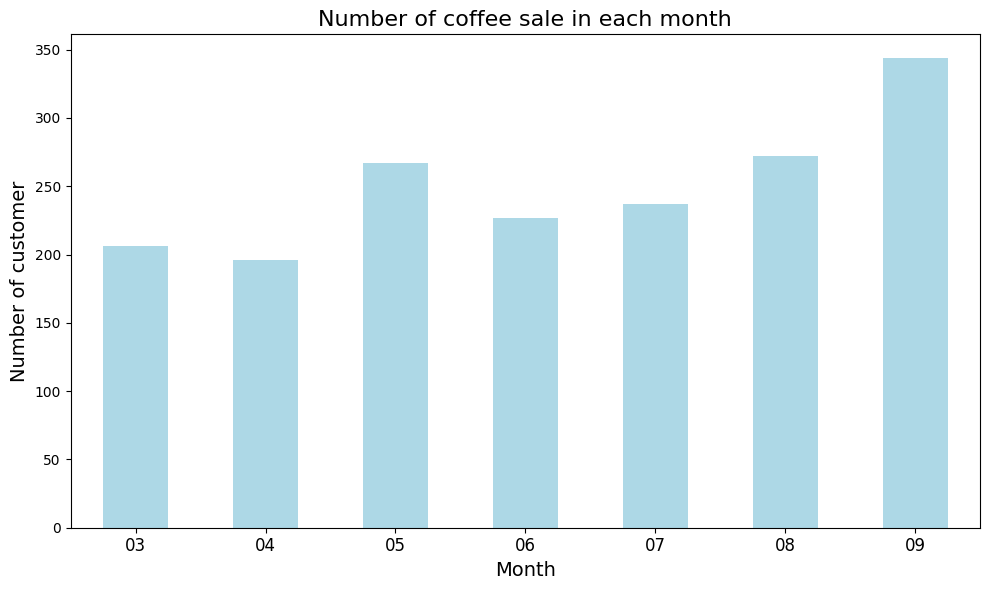

In [20]:
# สร้างกราฟแท่ง
ans.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sale in each month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [21]:
value = coff2.groupby(coff2['month'])['money'].sum().sort_index()
value


month
03    7050.20
04    6720.56
05    9063.42
06    7758.76
07    6915.94
08    7613.84
09    9988.64
Name: money, dtype: float64

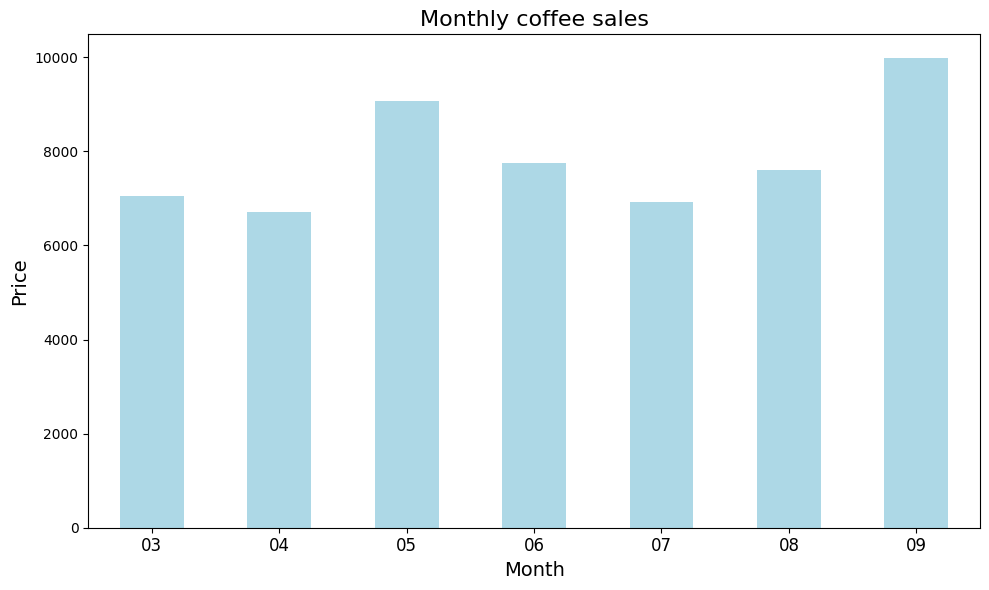

In [22]:
# สร้างกราฟแท่ง
value.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Monthly coffee sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายกาแฟในแต่ละเดือน (สร้างกราฟให้หน่อย)

In [23]:
value = coff2.groupby(['month','coffee_name']).size().unstack()
value

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
month,,,,,,,,
03,36,34,20,6,30,10,22,48
04,35,42,43,6,19,7,13,31
05,48,58,55,9,17,8,14,58
06,14,69,46,5,19,10,14,50
07,36,65,32,9,14,14,11,56
08,37,72,34,11,40,14,6,58
09,32,104,41,9,41,12,11,94


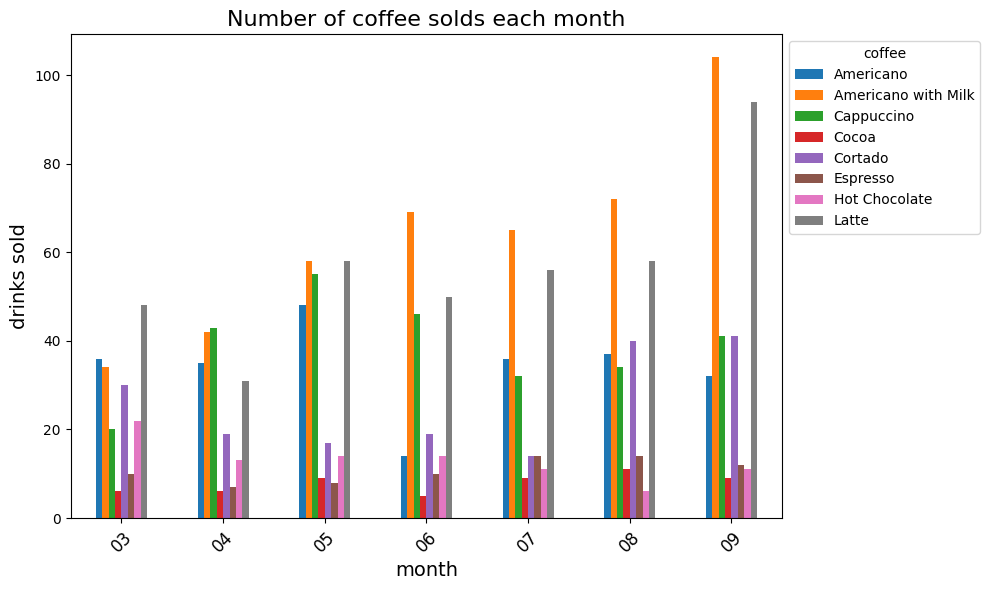

In [24]:
value.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee solds each month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('drinks sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

จะวิเคราะห์จำนวนแก้วที่ขายได้ว่ามีผลว่าจากอะไรบ้าง

In [25]:
temp = coff2.groupby('month')['temperature'].mean()
combined_df = pd.merge(value, temp, on='month')
combined_df

,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,temperature
month,,,,,,,,,
03,36,34,20,6,30,10,22,48,4.200000
04,35,42,43,6,19,7,13,31,12.662245
05,48,58,55,9,17,8,14,58,17.092509
06,14,69,46,5,19,10,14,50,21.426872
07,36,65,32,9,14,14,11,56,22.878903
08,37,72,34,11,40,14,6,58,22.580515
09,32,104,41,9,41,12,11,94,20.515407


จากผลการวิเคราะห์ความสัมพันธ์ (correlation) ที่คุณได้แสดงมา จะเห็นได้ว่ามีความสัมพันธ์ระหว่างยอดขายกาแฟและอุณหภูมิในบางระดับ โดยตัวเลขที่ได้จะอยู่ในช่วง -1 ถึง 1 โดยที่:

ค่าใกล้เคียง 1 แสดงว่ามีความสัมพันธ์เชิงบวกสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งก็เพิ่มตาม)
ค่าใกล้เคียง -1 แสดงว่ามีความสัมพันธ์เชิงลบสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งจะลดลง)
ค่าใกล้เคียง 0 แสดงว่ามีความสัมพันธ์ต่ำ หรือไม่มีความสัมพันธ์กัน

                     Americano  Americano with Milk  Cappuccino     Cocoa  \
Americano             1.000000            -0.230906    0.024815  0.576594   
Americano with Milk  -0.230906             1.000000    0.294779  0.492305   
Cappuccino            0.024815             0.294779    1.000000  0.031845   
Cocoa                 0.576594             0.492305    0.031845  1.000000   
Cortado               0.004379             0.489408   -0.333898  0.423639   
Espresso             -0.089523             0.523921   -0.466087  0.627347   
Hot Chocolate        -0.030597            -0.620067   -0.315886 -0.707981   
Latte                 0.031909             0.879023    0.084686  0.520529   
temperature          -0.230280             0.744061    0.427498  0.529541   

                      Cortado  Espresso  Hot Chocolate     Latte  temperature  
Americano            0.004379 -0.089523      -0.030597  0.031909    -0.230280  
Americano with Milk  0.489408  0.523921      -0.620067  0.879023     

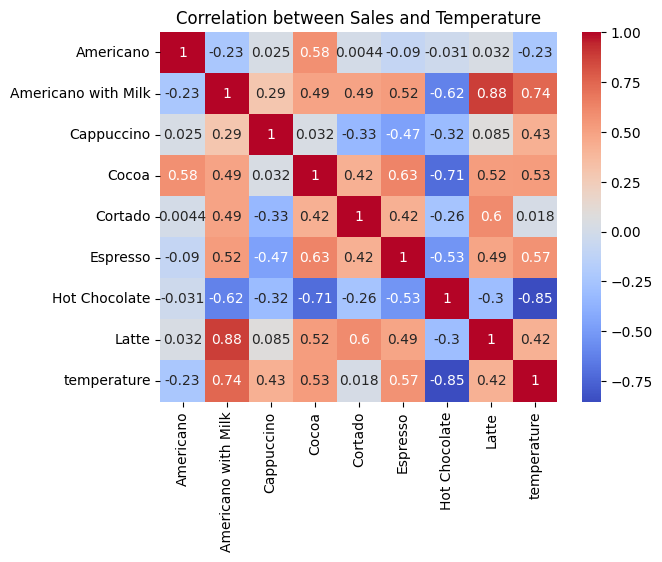

In [26]:
# การตรวจสอบความสัมพันธ์
correlation = combined_df.corr()
print(correlation)

# การสร้างกราฟ
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Temperature')
plt.show()


สร้างการดูยอดขายในแต่ละเดือนแยกตามกาแฟแต่ละชนิด ก็จะเห็นว่ายอดขายในมีนามียอดขายลาเต้ที่สูงที่สุด แล้วตามด้วยอเมริกาโน้แล้วก็อเมริกาโนใส่นมซึ่ง ซึ่งเดือนต่อมาก็มีคาปูชีโน่และAmericano with Milk ซึ่งมียอดขายพอๆกัน และในเดือนพฤษภาคมมียอดขายAmericano with Milk กับลาเต้ที่มียอดขายพอๆกัน และเดือนมิถุนายน กรกฏาตม สิงหาคม และกันยายน ยอดขายของ Americano with Milk ขายดีที่สุดและก็ลองลงมาเป็นลาเต้ และในส่วนของโกโก้ ช๊อคโกแลตร้อน เป็นเมนูหวานซึ่งคนนิยมกินน้อยเพราะไม่ใช่กาแฟ แต่ก็จะกลุ่มลูกค้าที่ชอบกินรสชาติหวานแล้ว
ก็ไม่กินกาแฟเข้ม ซึ่งจากข้อมูลจะเห็นว่าสามอันดับแรกส่วนใหญ่จะเป็น Americano with Milk ลาเต้ แล้วก็ Cappuccino แล้วถ้าดูจากความสัมพันธ์ของยอดขายกาแฟ ก็จะเห็นว่า 
จากตารางค่าสหสัมพันธ์ที่คุณให้มา นี่คือการตีความเกี่ยวกับยอดขายของเครื่องดื่มกาแฟแต่ละชนิดกับอุณหภูมิ:

การตีความความสัมพันธ์ระหว่างกาแฟแต่ละชนิดจากตารางค่าสหสัมพันธ์มีดังนี้:

1. **Americano**:
   - มีความสัมพันธ์เชิงบวกปานกลางกับ **Cocoa** (0.576594) ซึ่งอาจบ่งชี้ว่าผู้ที่ชอบดื่ม Americano อาจสนใจเครื่องดื่ม Cocoa ด้วย
   - มีความสัมพันธ์เชิงลบเล็กน้อยกับ **Americano with Milk** (-0.230906) และ **Temperature** (-0.230280) ซึ่งอาจหมายความว่าผู้บริโภคที่ชอบ Americano อาจไม่สนใจเครื่องดื่มที่มีนมหรืออาจดื่มในวันที่อุณหภูมิสูง

2. **Americano with Milk**:
   - มีความสัมพันธ์เชิงบวกสูงกับ **Latte** (0.879023) ซึ่งบ่งบอกว่าผู้ที่เลือกดื่ม Americano with Milk มักมีแนวโน้มที่จะดื่ม Latte ด้วย
   - มีความสัมพันธ์เชิงบวกกับ **Temperature** (0.744061) ซึ่งอาจแสดงว่าผู้คนมักเลือกดื่ม Americano with Milk ในวันที่มีอากาศเย็น

3. **Cappuccino**:
   - มีความสัมพันธ์เชิงบวกต่ำกับ **Americano with Milk** (0.294779) แสดงให้เห็นว่าผู้ที่ดื่ม Cappuccino อาจมีแนวโน้มที่จะดื่ม Americano with Milk
   - มีความสัมพันธ์เชิงบวกเล็กน้อยกับ **Temperature** (0.427498) อาจบ่งชี้ว่าผู้บริโภคชอบดื่ม Cappuccino ในวันที่อากาศเย็น

4. **Cocoa**:
   - มีความสัมพันธ์เชิงบวกกับ **Cortado** (0.423639) และ **Espresso** (0.627347) ซึ่งแสดงให้เห็นว่าผู้ที่ดื่ม Cocoa อาจสนใจดื่มกาแฟประเภทอื่นๆ ด้วย
   - มีความสัมพันธ์เชิงลบกับ **Hot Chocolate** (-0.707981) ซึ่งแสดงให้เห็นว่าผู้ที่เลือกดื่ม Cocoa มักไม่ดื่ม Hot Chocolate

5. **Cortado**:
   - มีความสัมพันธ์เชิงบวกกับ **Americano with Milk** (0.489408) และ **Latte** (0.595804) ซึ่งอาจบ่งชี้ว่าผู้บริโภคที่ดื่ม Cortado มักจะมีความสนใจในเครื่องดื่มที่มีนม
   - มีความสัมพันธ์เชิงบวกเล็กน้อยกับ **Temperature** (0.018076) แสดงให้เห็นว่าอุณหภูมิอาจไม่ส่งผลกระทบต่อการเลือกดื่ม Cortado มากนัก

6. **Espresso**:
   - มีความสัมพันธ์เชิงบวกกับ **Cocoa** (0.627347) และ **Latte** (0.486206) ซึ่งบ่งบอกว่าผู้ที่ชอบ Espresso มักสนใจเครื่องดื่มที่หลากหลาย
   - มีความสัมพันธ์เชิงลบกับ **Hot Chocolate** (-0.526648) ที่บ่งชี้ว่าผู้ที่เลือกดื่ม Espresso มักไม่ดื่ม Hot Chocolate

7. **Hot Chocolate**:
   - มีความสัมพันธ์เชิงลบสูงกับ **Temperature** (-0.851934) ซึ่งบ่งบอกว่าผู้คนมักดื่ม Hot Chocolate ในวันที่มีอากาศเย็นเท่านั้น
   - มีความสัมพันธ์เชิงลบกับ **Americano with Milk** (-0.620067) ที่แสดงให้เห็นว่าผู้ที่เลือกดื่ม Hot Chocolate อาจไม่สนใจเครื่องดื่มกาแฟที่มีนม

8. **Latte**:
   - มีความสัมพันธ์เชิงบวกสูงกับ **Americano with Milk** (0.879023) ซึ่งแสดงให้เห็นว่าผู้ที่ดื่ม Latte มักจะดื่ม Americano with Milk ด้วย
   - มีความสัมพันธ์เชิงบวกกับ **Temperature** (0.420851) ที่อาจหมายความว่าผู้คนเลือกดื่ม Latte ในวันที่อากาศเย็น

### สรุป
การวิเคราะห์นี้ชี้ให้เห็นว่าประเภทของกาแฟและอุณหภูมิของวันมีผลต่อการเลือกดื่มเครื่องดื่ม การเลือกดื่มกาแฟที่มีนมอาจจะมีความสัมพันธ์สูงกับกาแฟที่มีรสชาติหวานหรือเข้มข้นมากขึ้นในวันที่อากาศเย็น ในขณะที่กาแฟประเภทเข้มข้นอย่าง Espresso และ Americano อาจมีแนวโน้มในการบริโภคที่ลดลงในวันร้อน


In [27]:
day_week_count = coff2.groupby(['day_of_week']).size()
day_week_count

/tmp/ipykernel_1047/2539387812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_count = coff2.groupby(['day_of_week']).size()


day_of_week
Monday       251
Tuesday      285
Wednesday    231
Thursday     249
Friday       237
Saturday     251
Sunday       245
dtype: int64

ยอดขายกาแฟแต่ละชนิดในแต่ละสัปดาห์

In [28]:
day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()
day_week_coffee

/tmp/ipykernel_1047/7630883.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,47,65,40,7,19,6,8,59
Tuesday,32,83,37,15,30,5,21,62
Wednesday,33,55,35,7,25,15,8,53
Thursday,35,56,42,1,28,14,14,59
Friday,37,55,31,8,21,13,16,56
Saturday,26,70,39,12,28,12,8,56
Sunday,28,60,47,5,29,10,16,50


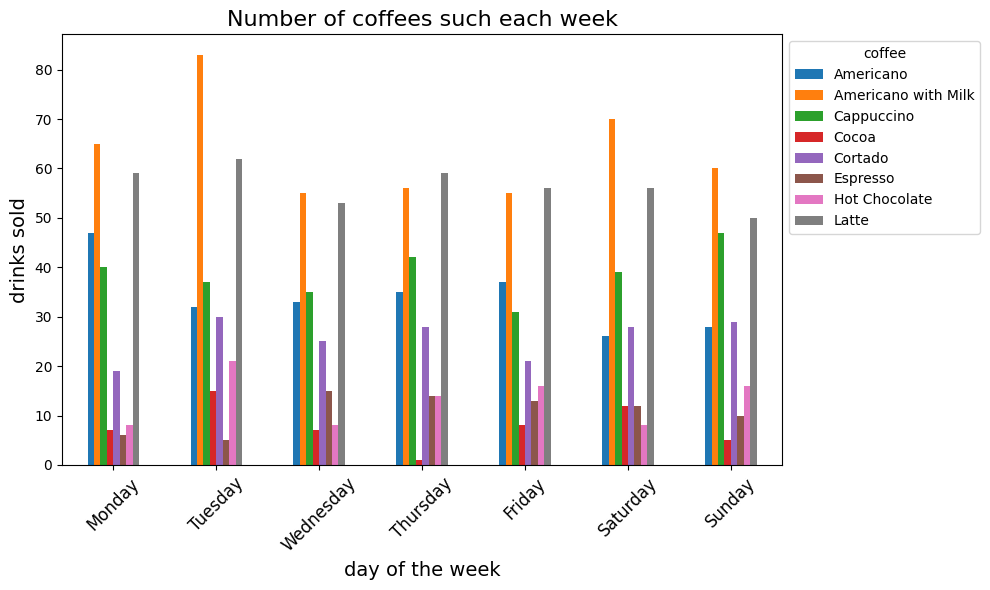

In [29]:
day_week_coffee.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffees such each week', fontsize=16)
plt.xlabel('day of the week', fontsize=14)
plt.ylabel('drinks sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [30]:
from scipy import stats
# ทำ ANOVA
f_statistic, p_value = stats.f_oneway(
    day_week_coffee['Americano'].dropna(),
    day_week_coffee['Americano with Milk'].dropna(),
    day_week_coffee['Cappuccino'].dropna(),
    day_week_coffee['Cocoa'].dropna(),
    day_week_coffee['Cortado'].dropna(),
    day_week_coffee['Espresso'].dropna(),
    day_week_coffee['Hot Chocolate'].dropna(),
    day_week_coffee['Latte'].dropna()
)

# แสดงผลลัพธ์
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if (p_value < 0.05) :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")
else :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")


F-statistic: 88.71280915466946
P-value: 2.9326060635615136e-25
ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์


In [31]:
n_total = day_week_coffee.count().sum()  # จำนวนข้อมูลทั้งหมด
k = day_week_coffee.shape[1]  # จำนวนกลุ่ม (coffee types)
df_residual = n_total - k  # degree of freedom สำหรับ residual
MSE = (f_statistic * df_residual) / (n_total - 1)

# คำนวณค่า LSD
alpha = 0.05  # ระดับความสำคัญ
t_value = stats.t.ppf(1 - alpha / 2, df_residual)  # ค่าตาราง t
n = day_week_coffee.count().min()  # ขนาดกลุ่มตัวอย่างที่น้อยที่สุด
LSD = t_value * np.sqrt((2 * MSE) / n)

print(f"MSE: {MSE}")
print(f"LSD: {LSD}")

# เปรียบเทียบค่าเฉลี่ยระหว่างกาแฟแต่ละชนิด
coffee_names = day_week_coffee.columns
for i in range(len(coffee_names)):
    for j in range(i + 1, len(coffee_names)):
        group1 = day_week_coffee[coffee_names[i]].dropna()
        group2 = day_week_coffee[coffee_names[j]].dropna()
        mean_diff = abs(np.mean(group1) - np.mean(group2))
        
        # ตรวจสอบว่าความแตกต่างมากกว่า LSD หรือไม่
        if mean_diff > LSD:
            print(f"{coffee_names[i]} และ {coffee_names[j]} มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")
        else:
            print(f"{coffee_names[i]} และ {coffee_names[j]} ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")

MSE: 77.42208798952971
LSD: 9.45652562004441
Americano และ Americano with Milk มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 29.42857142857143)
Americano และ Cappuccino ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 4.714285714285715)
Americano และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 26.142857142857142)
Americano และ Cortado ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 8.285714285714285)
Americano และ Espresso มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 23.285714285714285)
Americano และ Hot Chocolate มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.0)
Americano และ Latte มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 22.42857142857143)
Americano with Milk และ Cappuccino มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 24.714285714285715)
Americano with Milk และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 55.57142857142858)
Americano with Milk และ Cortado มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 37.714285714285715)
Americano with Milk และ Espresso มีความแตกต่างกัน

จากการวิเคราะห์ LSD ที่คุณได้ทำไว้เกี่ยวกับความนิยมของกาแฟแต่ละชนิด เราสามารถสรุปผลได้ดังนี้:

### กาแฟที่มีความแตกต่างอย่างมีนัยสำคัญ

1. **Americano กับ Americano with Milk**:
   - **Americano with Milk** มีความแตกต่างอย่างมีนัยสำคัญจาก **Americano** (mean diff = 29.43) ซึ่งบ่งชี้ว่า Americano with Milk น่าจะได้รับความนิยมมากกว่า Americano ในกลุ่มลูกค้าที่ชอบกาแฟที่มีรสนุ่มนวลและเข้มข้น

2. **Americano กับ Cocoa**:
   - Americano มีความแตกต่างอย่างมีนัยสำคัญจาก **Cocoa** (mean diff = 26.14) ทำให้เห็นว่า Americano มีความนิยมมากกว่า Cocoa และแสดงถึงความชอบของลูกค้าที่ต้องการกาแฟที่มีรสชาติเต็มที่

3. **Americano กับ Espresso**:
   - Americano มีความแตกต่างจาก **Espresso** (mean diff = 23.29) ซึ่งหมายความว่าลูกค้ามีแนวโน้มเลือก Americano มากกว่า Espresso

4. **Americano with Milk กับ Cocoa**:
   - **Americano with Milk** มีความแตกต่างอย่างมีนัยสำคัญจาก **Cocoa** (mean diff = 55.57) บ่งบอกถึงความนิยมที่สูงกว่า Cocoa โดยเฉพาะในกลุ่มลูกค้าที่ชื่นชอบกาแฟที่มีกลิ่นนม

5. **Cappuccino กับ Cocoa**:
   - **Cappuccino** มีความแตกต่างอย่างมีนัยสำคัญจาก Cocoa (mean diff = 30.86) แสดงให้เห็นว่าลูกค้าสนใจใน Cappuccino มากกว่า Cocoa

6. **Cappuccino กับ Espresso**:
   - Cappuccino มีความแตกต่างอย่างมีนัยสำคัญกับ **Espresso** (mean diff = 28.00) บ่งชี้ว่าลูกค้ามีแนวโน้มชอบ Cappuccino มากกว่า Espresso

7. **Latte กับ Cocoa**:
   - **Latte** มีความแตกต่างอย่างมีนัยสำคัญกับ **Cocoa** (mean diff = 48.57) แสดงถึงความนิยมที่ชัดเจนของ Latte มากกว่า Cocoa

8. **Cortado กับ Espresso**:
   - Cortado มีความแตกต่างจาก **Espresso** (mean diff = 15.00) ซึ่งบ่งบอกว่า Cortado ได้รับความนิยมมากกว่า Espresso 

9. **Espresso กับ Latte**:
   - Espresso และ **Latte** มีความแตกต่างอย่างมีนัยสำคัญ (mean diff = 45.71) ซึ่งแสดงถึงการเลือก Latte มากกว่า Espresso ในกลุ่มลูกค้า

### แนวโน้มของความนิยม

- **กาแฟที่มีรสนุ่มนวล**: กาแฟที่มีส่วนผสมของนม (Americano with Milk, Cappuccino, Latte) ดูเหมือนจะมีความนิยมสูงกว่าเครื่องดื่มที่เข้มข้นกว่า (Espresso, Cortado)
- **การเลือกเครื่องดื่ม**: ลูกค้ามักเลือกกาแฟที่มีรสชาติที่หลากหลายและเข้ากับความต้องการ เช่น Americano with Milk ที่ได้รับความนิยมมากกว่าเครื่องดื่มที่มีรสหวานน้อยกว่า
- **กลุ่มลูกค้า**: กาแฟที่มีส่วนผสมของนมมักจะมีความนิยมสูงในกลุ่มลูกค้าที่ต้องการรสชาติกลมกลืน ในขณะที่เครื่องดื่มที่เข้มข้นจะเหมาะกับกลุ่มลูกค้าที่ชื่นชอบรสชาติที่ชัดเจน

### การปรับกลยุทธ์

- **การโปรโมต**: มุ่งเน้นไปที่การส่งเสริมกาแฟที่มีความนิยมสูง และพัฒนาเมนูใหม่เพื่อดึงดูดกลุ่มลูกค้าใหม่
- **การตั้งราคา**: พิจารณาการตั้งราคาและโปรโมชั่นที่เหมาะสมเพื่อดึงดูดความสนใจจากลูกค้า
- **การวิจัยตลาด**: สำรวจความคิดเห็นจากลูกค้าเกี่ยวกับรสชาติและคุณสมบัติของกาแฟแต่ละชนิด เพื่อพัฒนาสินค้าให้ตอบสนองความต้องการ


ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน เช้า (Morning): 07:00 - 12:00 บ่าย (Afternoon): 12:00 - 18:00 เย็น (Evening): 18:00 - 22:00 (สร้างกราฟให้หน่อย)

In [32]:
value = coff2.groupby('time_period')['money'].sum()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']} ")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']} ")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 17871.78 
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 20466.84 
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 16772.74


/tmp/ipykernel_1047/2607369737.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = coff2.groupby('time_period')['money'].sum()


In [33]:
value = coff2.groupby('time_period').size()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']}")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']}")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 589
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 645
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 515


/tmp/ipykernel_1047/1120676006.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value = coff2.groupby('time_period').size()


In [34]:
# Group data by day_of_week, time_period, and coffee_name
sales_by_day_time = coff2.groupby(['day_of_week', 'time_period', 'coffee_name'], observed=False).size().reset_index(name='cups_sold')
sales_by_day_time

,day_of_week,time_period,coffee_name,cups_sold
0,Monday,Morning,Americano,19
1,Monday,Morning,Americano with Milk,24
2,Monday,Morning,Cappuccino,12
3,Monday,Morning,Cocoa,0
4,Monday,Morning,Cortado,13
...,...,...,...,...
163,Sunday,Evening,Cocoa,0
164,Sunday,Evening,Cortado,3
165,Sunday,Evening,Espresso,1
166,Sunday,Evening,Hot Chocolate,9


/tmp/ipykernel_1047/2368188135.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


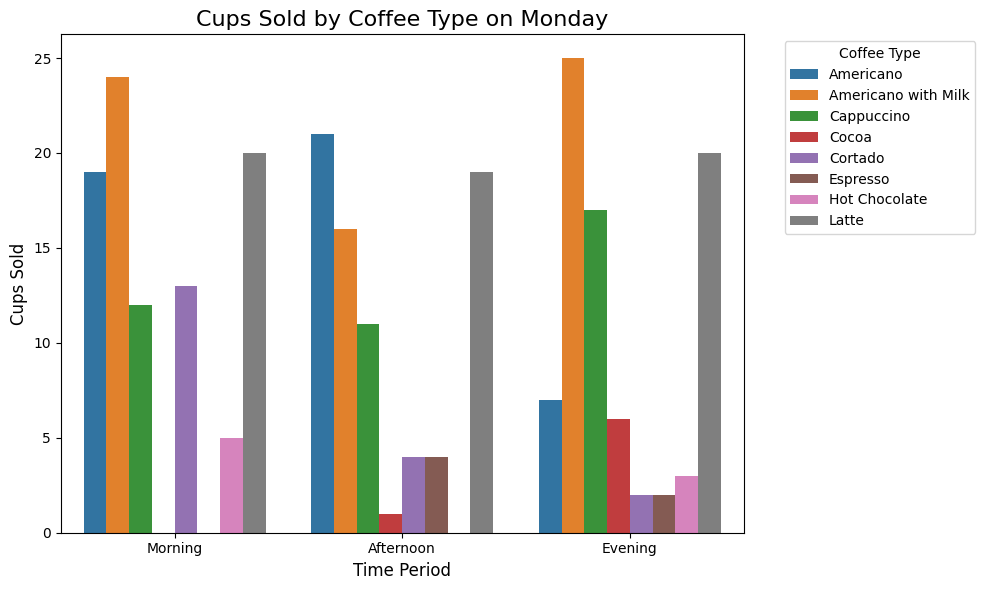

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

monday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Monday']

monday = monday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
monday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=monday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Monday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()


จากการดูกราฟยอดขายกาแฟแต่ละชนิดในแต่ละช่วงเวลาพบว่า ช่วงเช้าและช่วงบ่ายคนจะนิยมกินAmericano with Milk , latte และAmericano อาจะเป็นเพราะเป็นเวลาเช้าทำให้ต้องกินกาแฟแบบเข้มๆ 

/tmp/ipykernel_1047/3911462377.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tuesday = tuesday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


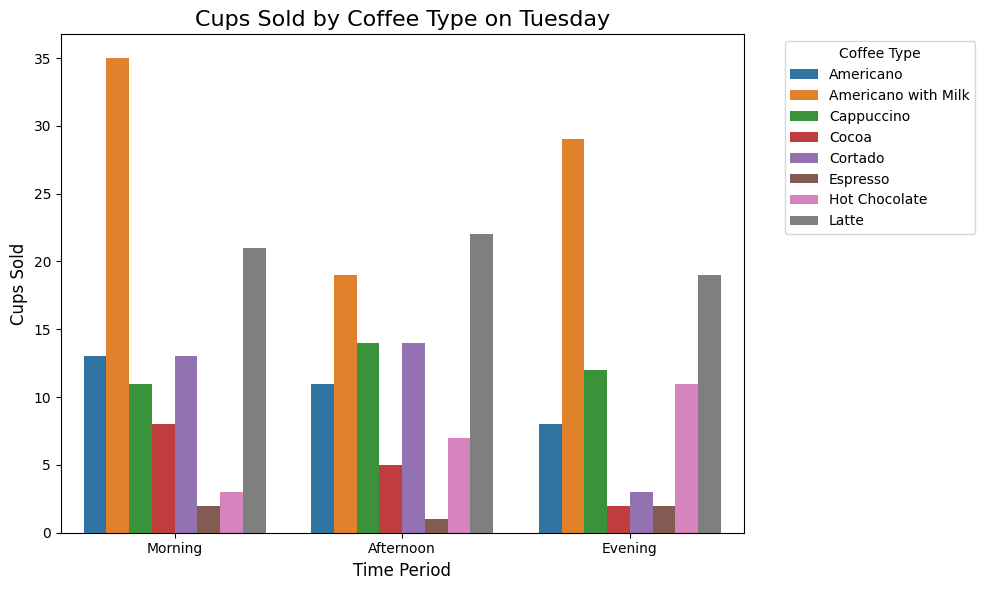

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

tuesday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Tuesday']

tuesday = tuesday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
tuesday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=tuesday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Tuesday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1047/123040014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wednesday = wednesday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


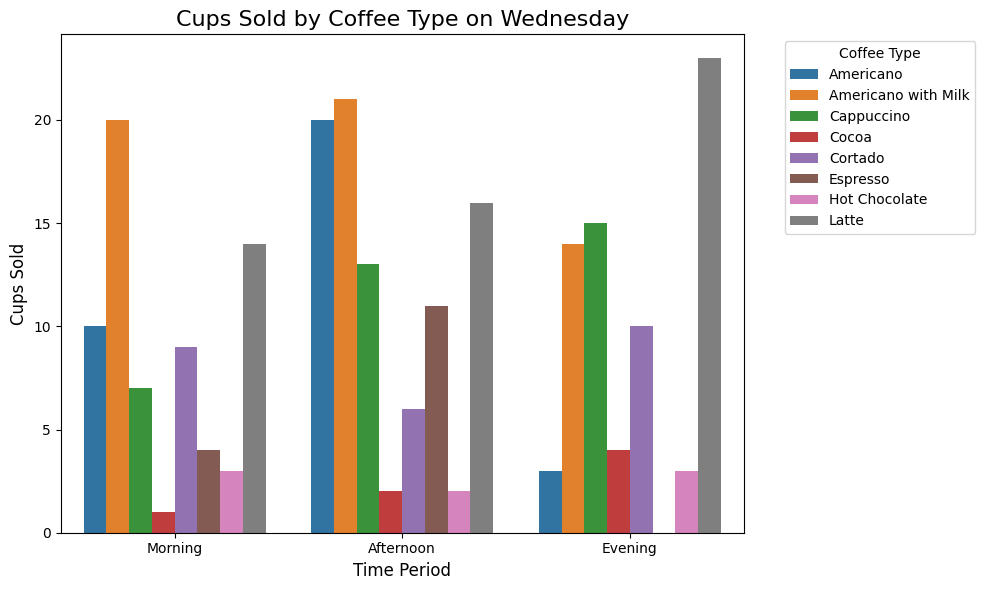

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

wednesday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Wednesday']

wednesday = wednesday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
wednesday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=wednesday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Wednesday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1047/3719082329.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  thursday = thursday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


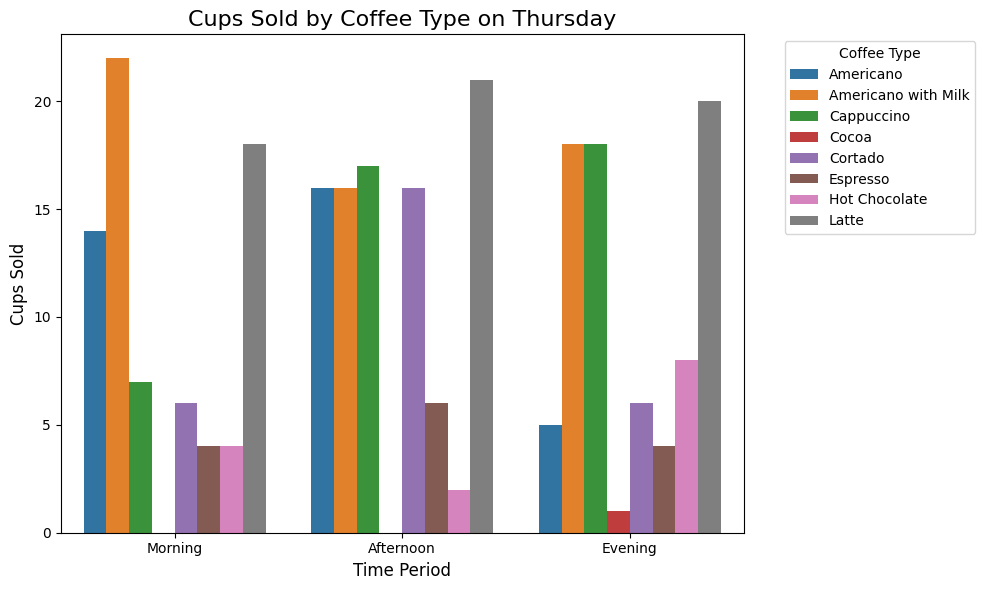

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

thursday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Thursday']

thursday = thursday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
thursday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=thursday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Thursday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1047/3926330072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  friday = friday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


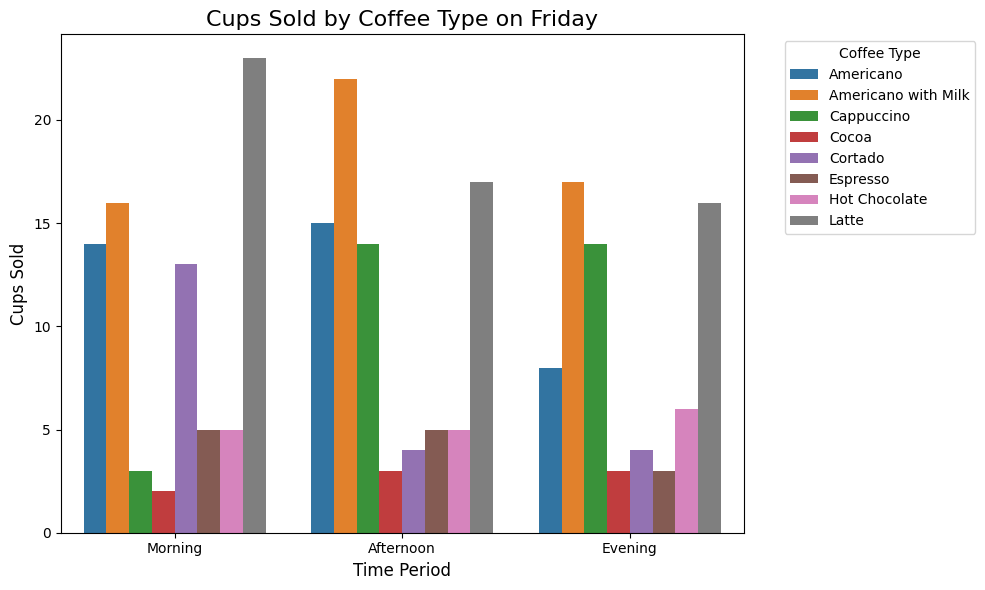

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

friday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Friday']

friday = friday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
friday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=friday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Friday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1047/1418835727.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  saturday = saturday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


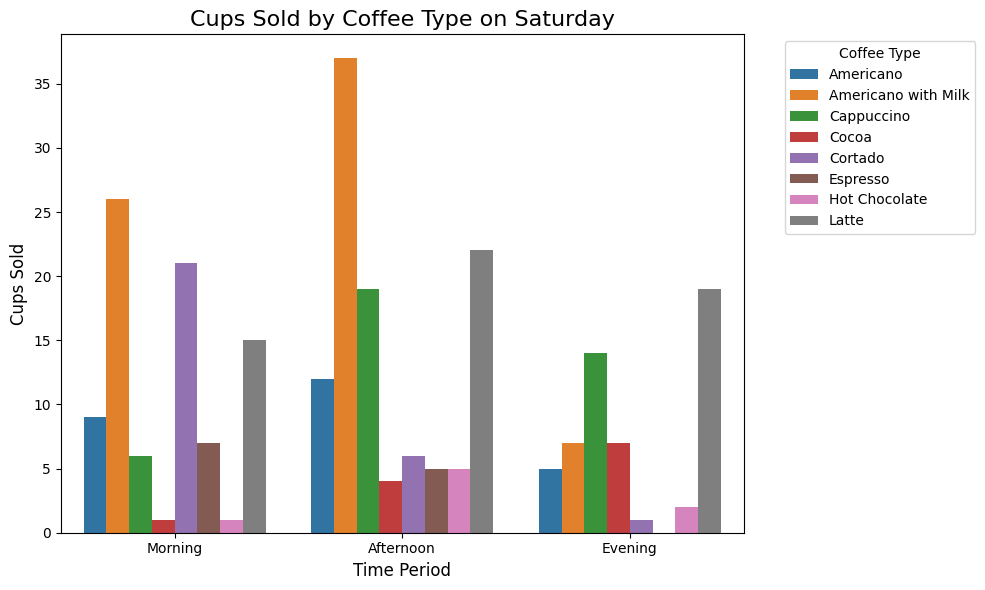

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

saturday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Saturday']

saturday = saturday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
saturday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=saturday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Saturday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

/tmp/ipykernel_1047/3513071277.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sunday = sunday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()


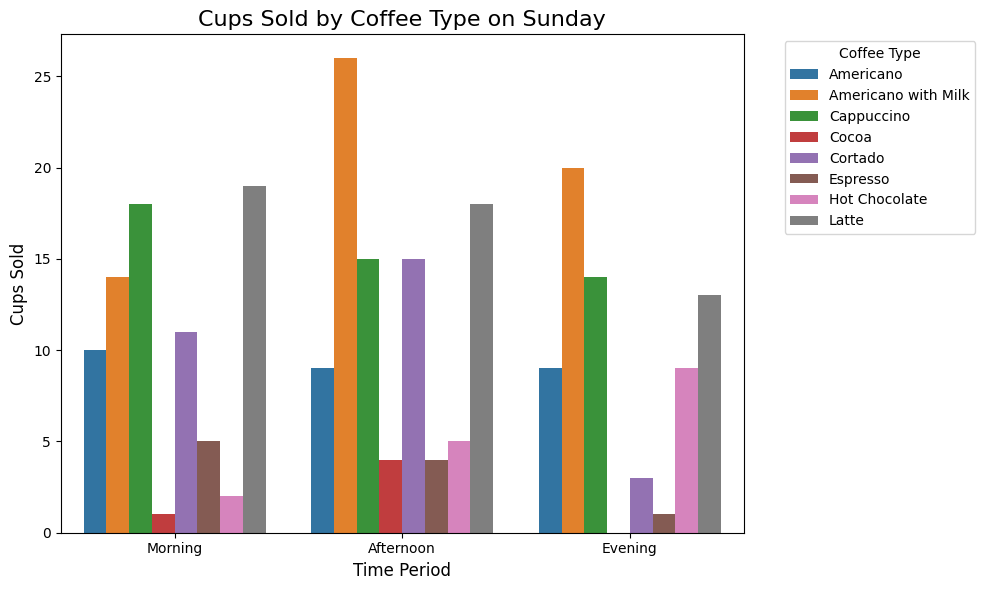

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sunday = sales_by_day_time[sales_by_day_time['day_of_week'] == 'Sunday']

sunday = sunday.groupby(['time_period','coffee_name'])['cups_sold'].sum().reset_index()
sunday

# สร้างกราฟ barplot โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=sunday, x='time_period', y='cups_sold', hue='coffee_name')

# กำหนดชื่อของแกนและชื่อของกราฟ
plt.title('Cups Sold by Coffee Type on Sunday', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Cups Sold', fontsize=12)

# แสดง legend (คำอธิบายของประเภทกาแฟ)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# แสดงผลกราฟ
plt.tight_layout()
plt.show()

จากข้อมูลยอดขายกาแฟในแต่ละวันของสัปดาห์ที่แบ่งตามช่วงเวลา สามารถสรุปแนวโน้มและวิเคราะห์ได้ดังนี้:

### 1. ความนิยมของกาแฟในช่วงเช้า (Morning)
- **Latte**: เป็นเครื่องดื่มที่ได้รับความนิยมสูงในช่วงเช้าของทุกวัน โดยเฉพาะวันศุกร์ (23 ถ้วย) และวันอังคาร (21 ถ้วย)
- **Americano with Milk**: ได้รับความนิยมมากที่สุดในวันเสาร์ (26 ถ้วย) และวันอังคาร (35 ถ้วย)
- **Cortado**: วันเสาร์เป็นวันที่ Cortado ขายดีที่สุดในช่วงเช้า (21 ถ้วย)
- **Espresso**: ขายได้อย่างสม่ำเสมอในทุกวัน โดยยอดขายสูงสุดคือวันเสาร์ (7 ถ้วย)

### 2. ความนิยมของกาแฟในช่วงบ่าย (Afternoon)
- **Americano with Milk**: วันเสาร์เป็นวันที่ได้รับความนิยมสูงที่สุด (37 ถ้วย) เมื่อเทียบกับวันอื่น ๆ
- **Cappuccino**: ยอดขายค่อนข้างสม่ำเสมอในช่วงบ่าย โดยวันเสาร์มียอดขายสูงสุด (19 ถ้วย)
- **Latte**: ขายได้ดีในทุกวัน โดยวันเสาร์ (22 ถ้วย) และวันอังคาร (22 ถ้วย) เป็นวันที่ขายดีที่สุด
- **Cortado**: วันอังคาร (14 ถ้วย) และวันพฤหัสบดี (16 ถ้วย) เป็นวันที่ Cortado ขายได้มาก

### 3. ความนิยมของกาแฟในช่วงเย็น (Evening)
- **Americano with Milk**: ขายดีในช่วงเย็นของทุกวัน โดยวันอังคาร (29 ถ้วย) และวันศุกร์ (17 ถ้วย) มียอดขายสูง
- **Cappuccino**: วันพฤหัสบดี (18 ถ้วย) และวันพุธ (15 ถ้วย) มียอดขายสูงในช่วงเย็น
- **Hot Chocolate**: วันศุกร์ (6 ถ้วย) และวันอาทิตย์ (9 ถ้วย) เป็นวันที่เครื่องดื่มนี้ขายได้มาก
- **Latte**: ขายดีในช่วงเย็นทุกวัน โดยวันพุธ (23 ถ้วย) และวันจันทร์ (20 ถ้วย) มียอดขายสูงสุด

### 4. สรุปแนวโน้มยอดขายกาแฟ
- **Latte และ Americano with Milk**: เป็นกาแฟที่ขายดีในทุกช่วงเวลาและทุกวัน โดยเฉพาะวันอังคารและวันศุกร์
- **Cortado และ Cappuccino**: มีความนิยมสูงในช่วงเช้าและบ่าย โดยเฉพาะในวันเสาร์และวันพฤหัสบดี
- **Hot Chocolate**: ได้รับความนิยมในช่วงเย็นของวันอาทิตย์และวันศุกร์

การวิเคราะห์นี้สามารถใช้เพื่อเข้าใจพฤติกรรมการซื้อของลูกค้าในแต่ละวันและช่วงเวลา ซึ่งจะเป็นประโยชน์ต่อการจัดการสต็อกสินค้าและโปรโมชั่น

จำนวนคนที่มาซื้อซ้ำ

In [42]:
countCard = coff2[coff2['cash_type'] == 'card'].shape[0]
countCash = coff2[coff2['cash_type'] == 'cash'].shape[0]
duplicate_customers = coff2['card'].value_counts()
# print(duplicate_customers).
# หาผู้ที่มาซ้ำ (คนที่ซื้ออย่างน้อย 2 ครั้ง)
repeat_customers = duplicate_customers[duplicate_customers > 1]
notrepeat_customers = duplicate_customers[duplicate_customers == 1]
# นับจำนวนคนที่มาซื้อกาแฟซ้ำ
num_repeat_customers = len(repeat_customers)
num_notrepeat_customers = len(notrepeat_customers)

#
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]
# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')
# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()
hi2 = purchase_counts['purchase_count'].sum()


print(f"รายการทั้งหมด {coff2.shape[0]} ราบการ")
print(f"เฉพาะคนที่จ่ายด้วยบัตร {countCard} รายการ \
\nซึ่งประกอบด้วยซื้อซ้ำ {hi2} รายการและไม่ซื้อซ้ำ {countCard - hi2} รายการ" )
print(f"เฉพาะคนที่จ่ายด้วยเงินสด {countCash} รายการ")

print(f"จำนวนคนซื้อซ้ำ {num_repeat_customers + num_notrepeat_customers} คน")
print(f"จำนวนคนที่ซื้อซ้ำ : {num_repeat_customers} คน")
print(f"จำนวนคนที่ไม่ซื้อซ้ำ : {num_notrepeat_customers} คน")
print()
print(f"ในที่นี้ให้รายการสั่งซื้อด้วยเงินสด 1 รายการ = จำนวนคนที่ซื้อด้วยเงินสด 1 คน\
\nดังนั้นจำนวนคนที่ด้วยเงินสด: {countCash} คน")
print(f"รวมจำนวนคนทั้งสิ้น {num_repeat_customers + num_notrepeat_customers+ countCash} คน")

รายการทั้งหมด 1749 ราบการ
เฉพาะคนที่จ่ายด้วยบัตร 1660 รายการ 
ซึ่งประกอบด้วยซื้อซ้ำ 1236 รายการและไม่ซื้อซ้ำ 424 รายการ
เฉพาะคนที่จ่ายด้วยเงินสด 89 รายการ
จำนวนคนซื้อซ้ำ 695 คน
จำนวนคนที่ซื้อซ้ำ : 271 คน
จำนวนคนที่ไม่ซื้อซ้ำ : 424 คน

ในที่นี้ให้รายการสั่งซื้อด้วยเงินสด 1 รายการ = จำนวนคนที่ซื้อด้วยเงินสด 1 คน
ดังนั้นจำนวนคนที่ด้วยเงินสด: 89 คน
รวมจำนวนคนทั้งสิ้น 784 คน


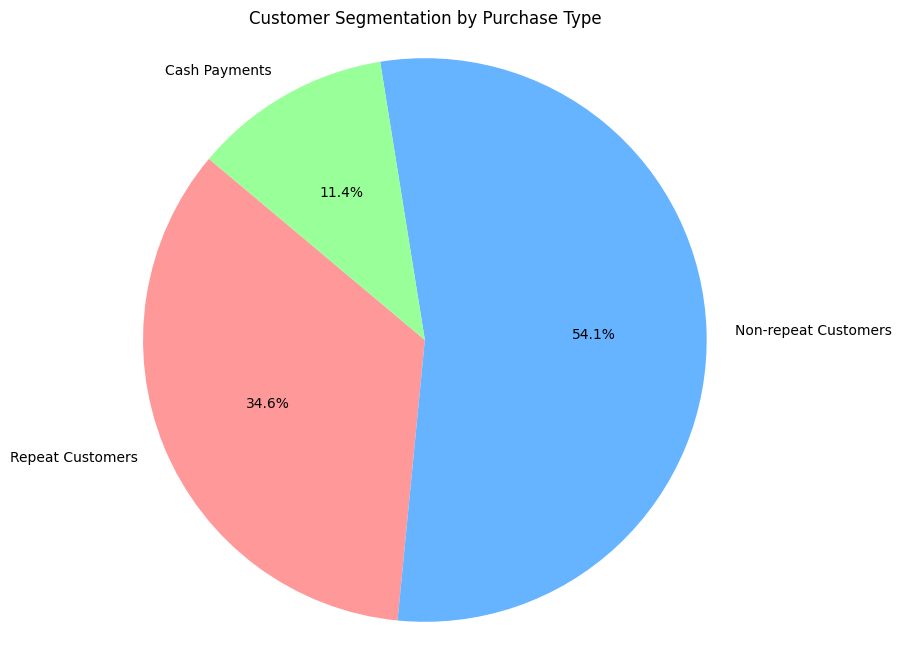

In [43]:
# กำหนดค่าที่ต้องการแสดงในกราฟ
labels = ['Repeat Customers', 'Non-repeat Customers', 'Cash Payments']
sizes = [num_repeat_customers, num_notrepeat_customers, countCash]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # กำหนดสีสำหรับแต่ละส่วน

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # ทำให้กราฟเป็นวงกลม

# ตั้งชื่อกราฟ
plt.title('Customer Segmentation by Purchase Type')

# แสดงกราฟ
plt.show()

แผนภูมิวงกลม ที่บอกคนซื้อซ้ำกับคนที่ไม่มาซื้อซ้ำ

In [44]:
# Step 1: กรองข้อมูลลูกค้าที่ซื้อซ้ำ
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]
# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')
# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()
hi2 = purchase_counts['purchase_count'].sum()
print(f"รายการซื้อซ้ำ {hi2} รายการ")

print("จำนวนลูกค้าแต่ละกลุ่มที่ซื้อซ้ำดังนี้")
print(counts_per_customer)

รายการซื้อซ้ำ 1236 รายการ
จำนวนลูกค้าแต่ละกลุ่มที่ซื้อซ้ำดังนี้
purchase_count
2      153
3       43
4       20
5       17
6        7
7        6
8        4
9        1
10       2
11       2
12       4
13       3
14       1
17       1
21       1
27       1
36       1
41       1
58       1
67       1
101      1
Name: count, dtype: int64


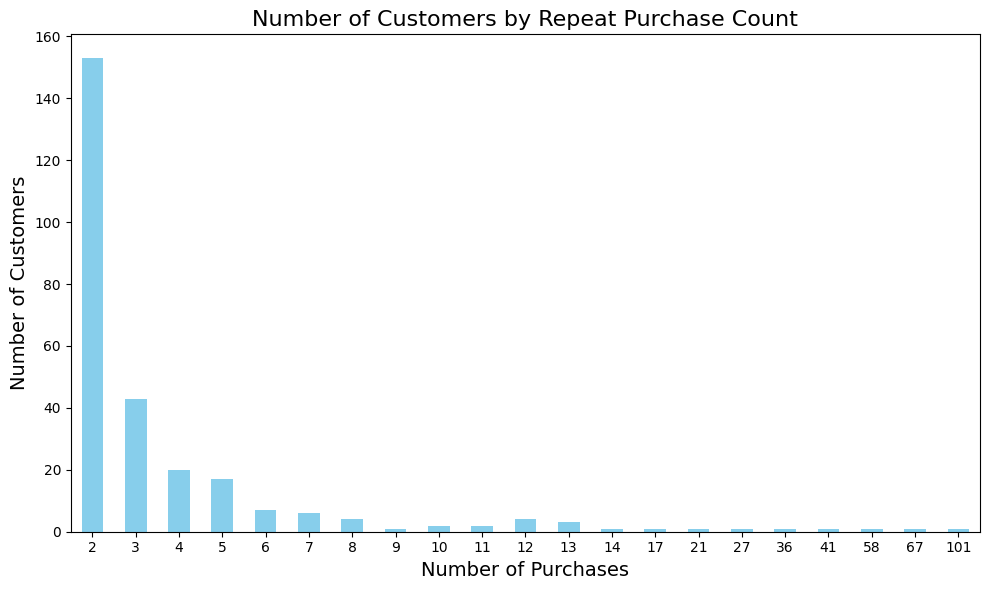

In [45]:
repeat_customers = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]

# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts = repeat_customers.groupby('card').size().reset_index(name='purchase_count')

# หากต้องการนับจำนวนลูกค้าในแต่ละจำนวนรายการที่ซื้อ
counts_per_customer = purchase_counts['purchase_count'].value_counts().sort_index()

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
counts_per_customer.plot(kind='bar', color='skyblue')

# ตั้งชื่อกราฟและแกน
plt.title('Number of Customers by Repeat Purchase Count', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=0)  # หมุนป้ายแกน x ให้อยู่ในแนวตั้ง

# แสดงกราฟ
plt.tight_layout()
plt.show()

จากข้อมูลนี้ 
จำนวนคนซื้อซ้ำ 695 คน
จำนวนคนที่ซื้อซ้ำ : 271 คน
จำนวนคนที่ไม่ซื้อซ้ำ : 424 คน
สามารถสร้างกราฟได้ดังนี้


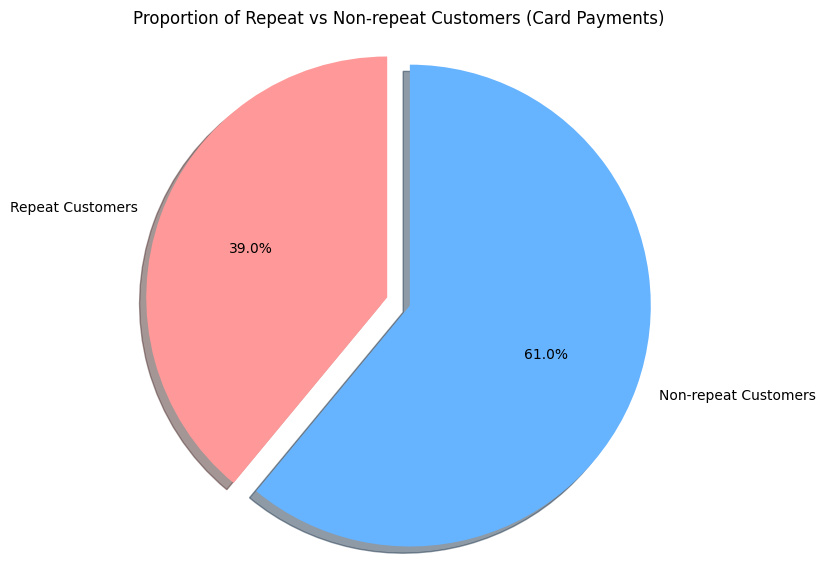

In [46]:
# Data for repeat and not repeat customers
print(f"จากข้อมูลนี้ \nจำนวนคนซื้อซ้ำ {num_repeat_customers + num_notrepeat_customers} คน")
print(f"จำนวนคนที่ซื้อซ้ำ : {num_repeat_customers} คน")
print(f"จำนวนคนที่ไม่ซื้อซ้ำ : {num_notrepeat_customers} คน")
print(f"สามารถสร้างกราฟได้ดังนี้")
labels = ['Repeat Customers', 'Non-repeat Customers']
sizes = [num_repeat_customers, num_notrepeat_customers]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode first slice (repeat customers)

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Proportion of Repeat vs Non-repeat Customers (Card Payments)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [47]:
# หาลูกค้าที่ซื้อเพียงครั้งเดียว
customer_counts = coff2['card'].value_counts()

# กรองเฉพาะลูกค้าที่ซื้อครั้งเดียว
single_purchase_customers = customer_counts[customer_counts == 1].index

# กรองข้อมูลสำหรับลูกค้าที่ซื้อครั้งเดียว และดึงสินค้าที่พวกเขาซื้อไป
single_purchase_data = coff2[coff2['card'].isin(single_purchase_customers)]

# ตรวจสอบว่าลูกค้าที่ซื้อครั้งเดียวซื้อสินค้าอะไรบ้าง
items_purchased_by_single_purchase_customers = single_purchase_data['coffee_name'].value_counts()

print("สินค้าที่ลูกค้าที่ไม่ซื้อซ้ำซื้อไปมีดังนี้:")
print(items_purchased_by_single_purchase_customers)

สินค้าที่ลูกค้าที่ไม่ซื้อซ้ำซื้อไปมีดังนี้:
coffee_name
Latte                  102
Americano with Milk     98
Cappuccino              82
Americano               52
Cortado                 29
Hot Chocolate           26
Espresso                25
Cocoa                   10
Name: count, dtype: int64


/tmp/ipykernel_1047/1523014007.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items_purchased_by_single_purchase_customers.index,


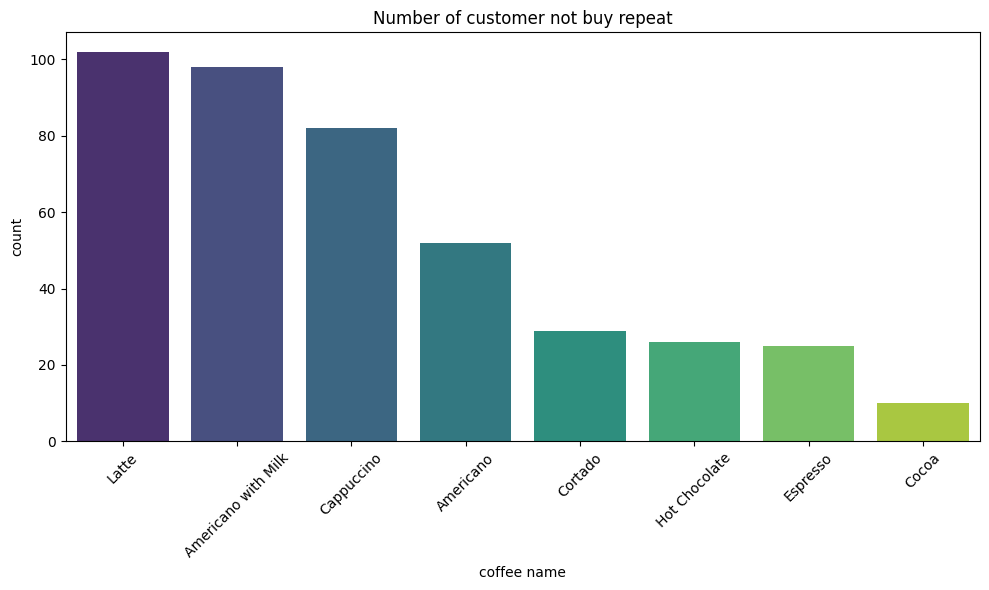

In [48]:
# หาลูกค้าที่ซื้อเพียงครั้งเดียว
customer_counts = coff2['card'].value_counts()

# กรองเฉพาะลูกค้าที่ซื้อครั้งเดียว
single_purchase_customers = customer_counts[customer_counts == 1].index

# กรองข้อมูลสำหรับลูกค้าที่ซื้อครั้งเดียว และดึงสินค้าที่พวกเขาซื้อไป
single_purchase_data = coff2[coff2['card'].isin(single_purchase_customers)]

# ตรวจสอบว่าลูกค้าที่ซื้อครั้งเดียวซื้อสินค้าอะไรบ้าง
items_purchased_by_single_purchase_customers = single_purchase_data['coffee_name'].value_counts()

# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
sns.barplot(x=items_purchased_by_single_purchase_customers.index,
            y=items_purchased_by_single_purchase_customers.values, palette='viridis')

# ตั้งชื่อกราฟ
plt.title('Number of customer not buy repeat')
plt.xlabel('coffee name')
plt.ylabel('count')

# แสดงกราฟ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

จะดูว่าราคาแต่ละเมนูเท่ากันไหมของคนซื้อซ้ำ
ดูว่าบัตรไหน ซื้อกาแฟซ้ำกี่รอบ และใครซื้อซ้ำมากสุด

In [49]:
# Step 1: กรองข้อมูลลูกค้าที่ซื้อซ้ำ
repeat_customers2 = coff2[coff2['card'].isin(duplicate_customers[duplicate_customers > 1].index)]
# Step 2: จัดกลุ่มตาม 'card' และนับจำนวนรายการที่ซื้อ
purchase_counts_per_card = repeat_customers2.groupby('card').size().reset_index(name='purchase_count')

# แสดงผลบัตรแต่ละใบพร้อมจำนวนครั้งที่ซื้อซ้ำ
print("บัตรแต่ละใบมาซื้อซ้ำกี่รอบบ้าง:")
print(purchase_counts_per_card)
max_purchase_count = purchase_counts_per_card['purchase_count'].max()
eiei = purchase_counts_per_card[purchase_counts_per_card['purchase_count'] == max_purchase_count]
print()
print(f"ซื้อซ้ำมากสุดคือ \n{eiei}")


บัตรแต่ละใบมาซื้อซ้ำกี่รอบบ้าง:
                    card  purchase_count
0    ANON-0000-0000-0001              17
1    ANON-0000-0000-0002               2
2    ANON-0000-0000-0003              27
3    ANON-0000-0000-0004              11
4    ANON-0000-0000-0008               2
..                   ...             ...
266  ANON-0000-0000-0678               2
267  ANON-0000-0000-0683               2
268  ANON-0000-0000-0686               2
269  ANON-0000-0000-0687               2
270  ANON-0000-0000-0694               2

[271 rows x 2 columns]

ซื้อซ้ำมากสุดคือ 
                  card  purchase_count
6  ANON-0000-0000-0012             101


หาราคากาแฟที่เท่ากันจากคนที่มาซื้อกาแฟซ้ำและซื้อกาแฟชนิดเดียวกันมากกว่า1ครั้ง ว่าได้ราคาเท่ากันไหม ผลที่ได้คือส่วนมากได้กาแฟในราคาที่เท่ากัน ซึ่งกาแฟที่ได้ในราคาที่แตกต่างกันอาจจะขึ้นอยู่กับส่วนลด หรือโปรโมชั่น ทางเราก็ไม่ทราบ

In [50]:
# จัดกลุ่มตาม 'card', 'coffee_name', และ 'money' (ราคา)
repeat_purchases_with_price = coff2.groupby(['card', 'coffee_name'])['money'].apply(list).reset_index(name='purchase_prices')

# นับจำนวนครั้งที่ซื้อกาแฟชนิดเดียวกัน (จำนวนแก้ว)
repeat_purchases_with_price['purchase_count'] = repeat_purchases_with_price['purchase_prices'].apply(len)

# สร้างคอลัมน์ใหม่เพื่อตรวจสอบว่าราคาซื้อทุกครั้งเท่ากันหรือไม่
repeat_purchases_with_price['is_price_equal'] = repeat_purchases_with_price['purchase_prices'].apply(lambda x: len(set(x)) == 1)

# กรองเฉพาะลูกค้าที่ซื้อกาแฟชนิดเดียวกันมากกว่า 1 แก้ว
repeat_purchases_with_price = repeat_purchases_with_price[repeat_purchases_with_price['purchase_count'] > 1]

# แสดงผลลูกค้าที่ซื้อกาแฟซ้ำกันกี่แก้ว พร้อมราคาของแต่ละรอบ และตรวจสอบว่าราคาเท่ากันหรือไม่
print(repeat_purchases_with_price)
print(repeat_purchases_with_price['is_price_equal'].value_counts())

                    card          coffee_name  \
0    ANON-0000-0000-0001                Latte   
1    ANON-0000-0000-0002        Hot Chocolate   
2    ANON-0000-0000-0003            Americano   
4    ANON-0000-0000-0003              Cortado   
6    ANON-0000-0000-0004            Americano   
..                   ...                  ...   
891  ANON-0000-0000-0655  Americano with Milk   
896  ANON-0000-0000-0660                Latte   
903  ANON-0000-0000-0666  Americano with Milk   
904  ANON-0000-0000-0667  Americano with Milk   
914  ANON-0000-0000-0676           Cappuccino   

                                       purchase_prices  purchase_count  \
0    [38.7, 38.7, 38.7, 38.7, 38.7, 37.72, 37.72, 3...              17   
1                                         [38.7, 38.7]               2   
2    [28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28.9, 28....              21   
4                            [28.9, 28.9, 28.9, 27.92]               4   
6                      [28.9, 28.9, 28.9,

สร้างกราฟ

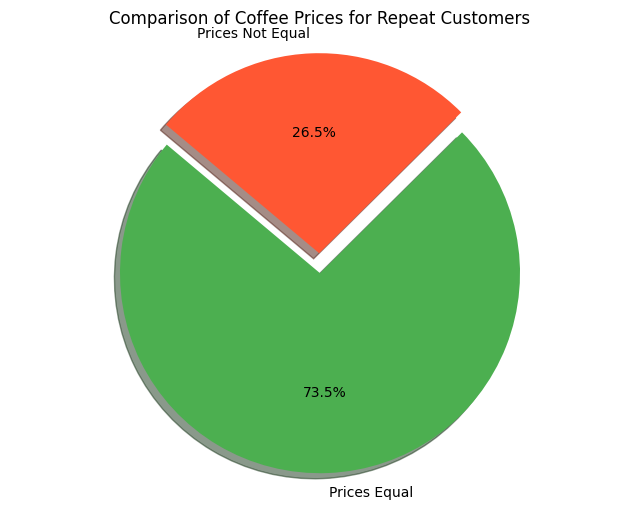

In [51]:
# Data
labels = ['Prices Equal', 'Prices Not Equal']
sizes = [164, 59]
colors = ['#4CAF50', '#FF5733']  # Green and Red colors
explode = (0.1, 0)  # Explode the first slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Title
plt.title('Comparison of Coffee Prices for Repeat Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Show the plot
plt.show()

In [52]:
# ตรวจสอบว่า 'date' อยู่ในรูปแบบ datetime
coff2['date'] = pd.to_datetime(coff2['date'])

# ตั้งค่า 'date' ให้เป็น index เพื่อใช้กับ resample()
coff2.set_index('date', inplace=True)

# หายอดขายต่อวัน
daily_sales = coff2.groupby('date')['money'].sum()

# คำนวณค่าเฉลี่ยยอดขายต่อวัน
mean_daily_sales = daily_sales.mean()

print(f"คาดการณ์ยอดขายต่อวัน: {mean_daily_sales:.2f} UAH")

# คำนวณยอดขายต่อสัปดาห์
weekly_sales = daily_sales.resample('W').sum()

# คำนวณยอดขายต่อเดือน
monthly_sales = daily_sales.resample('ME').sum()

# คำนวณค่าเฉลี่ยยอดขายต่อเดือน
mean_monthly_sales = monthly_sales.mean()

# คำนวณค่าเฉลี่ยยอดขายต่อสัปดาห์
mean_weekly_sales = weekly_sales.mean()

# คำนวณค่าเฉลี่ยยอดขายต่อเดือน
mean_monthly_sales = monthly_sales.mean()

print(f"คาดการณ์ยอดขายต่อสัปดาห์: {mean_weekly_sales:.2f} UAH")
print(f"คาดการณ์ยอดขายต่อเดือน: {mean_monthly_sales:.2f} UAH")

คาดการณ์ยอดขายต่อวัน: 261.19 UAH
คาดการณ์ยอดขายต่อสัปดาห์: 1722.23 UAH
คาดการณ์ยอดขายต่อเดือน: 7873.05 UAH
